In [16]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')  # 可选：屏蔽大量 RDKit 日志

from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from dscribe.descriptors import CoulombMatrix
import glob
import numpy as np
import pandas as pd
from ase import io

from tqdm.notebook import tqdm

In [17]:
cleaned_all_products_without_Se = pd.read_csv('./generate_new_molecules/data/cleaned_all_products_without_Se.csv')
pro_smiles = cleaned_all_products_without_Se['product'].values
cleaned_all_products_without_Se.head()

,index,smi1,smi2,product,pro_from_smi1_name,similarity
0,0,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,a1,0.888889
1,1,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c...,a1,0.888889
2,2,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccccc1-c1c2ccccc2c(-c2ccccc2)c2c(-c3ccccc3)...,a1,0.727273
3,6,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1cccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,a1,0.888889
4,7,c1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4c...,CBr,Cc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c4...,a1,0.888889


In [8]:
cleaned_all_products_without_Se[cleaned_all_products_without_Se['pro_from_smi1_name']=='p114']

,index,smi1,smi2,product,pro_from_smi1_name,similarity
7482,36553,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,0.962963
7483,36554,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([nH...,p114,0.962963
7484,36569,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,CBr,Cc1cc2[nH]c1c(-c1c(Cl)cccc1Cl)c1nc(c(-c3c(Cl)c...,p114,0.962963
7485,36594,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7486,36596,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963
7487,36626,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,BrBr,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(B...,p114,0.962963
7488,36674,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1ccc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([...,p114,1.000000
7489,36676,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cc(Cl)c(-c2c3nc(c(-c4c(Cl)cccc4Cl)c4ccc([n...,p114,1.000000
7490,36706,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,ClCl,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3cc(C...,p114,1.000000
7491,36754,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,II,Clc1cccc(Cl)c1-c1c2nc(c(-c3c(Cl)cccc3Cl)c3ccc(...,p114,0.962963


### test：使用SDMolSupplier从SDF文件中获取分子结构信息

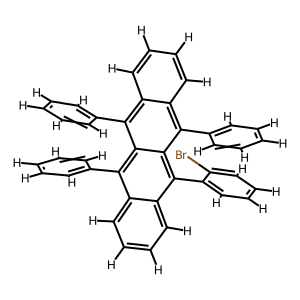

In [4]:
sdf_dir = '1.syn_to_gen_3D/2.2 sdf_files'
sdf_file = os.path.join(sdf_dir,'8.sdf')
# sdf_file = r'C:\Users\xiaoyu\Desktop\click\molecule_Structure_ChemDraw\acceptor_sdf_files\acceptor1.sdf'
acceptor1 = Chem.SDMolSupplier(sdf_file,sanitize=False)
mols = [mol for mol in acceptor1]  # 将mol从上面的rdmolfiles中提取出来
acceptor1, mols, len(mols)
Draw.MolToImage(mols[0])

#### 生成描述的函数

In [26]:
def GetRdkitDescriptorsFromFiles(input_dir:str, csv_file:str):
    # 准备描述符计算器
    sdf_files = [f for f in os.listdir(input_dir) if f.endswith('.sdf')]
    descs = [desc_name[0] for desc_name in Descriptors._descList]
    desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)  

    # 初始化DataFrame存储所有分子描述符
    all_descriptors = []

    # 用于检测重复的分子
    smiles_dict = {}
    
    for sdf_file in tqdm(sdf_files, desc="Processing SDF files", unit="file"):
        # 获取完整的文件路径
        file_path = os.path.join(input_dir, sdf_file)
    #     print(sdf_file)
        try:
            # 读取SDF文件中的分子
            suppl = Chem.SDMolSupplier(file_path)
            mols = [mol for mol in suppl if mol is not None]

            # 检查是否有多个分子
            if len(mols) > 1:
                print(f"Warning: {sdf_file} contains multiple molecules. Skipping...")
                continue

            # 如果文件中有没有有效分子
            if not mols:
                print(f"Warning: No valid molecules found in {sdf_file}")
                continue

            mol = mols[0]  # 获取第一个分子（每个SDF文件最多一个分子）
            smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)   # 保留分子手性，并生成规范化的SMILES

            # 检查分子重复
            if smiles in smiles_dict:
                print(f"Warning: Duplicate molecule found in {sdf_file}. "
                      f"SMILES: {smiles} is already present in {smiles_dict[smiles]}. Skipping...")
                '''已经知道239与203的分子结构重复，因此取消continue，继续保存分子239的数据'''
#                 continue  
            # 记录分子SMILES和文件名
            smiles_dict[smiles] = sdf_file


            # 计算分子描述符
            descriptors = desc_calc.CalcDescriptors(mol)
            num_atoms_total = mol.GetNumAtoms(onlyExplicit=False)  # 计算包括隐式氢的原子总数
            num_atoms_heavy = mol.GetNumAtoms(onlyExplicit=True) # 计算只包括非氢原子的总数
            descriptor_data = [sdf_file, smiles, num_atoms_total, num_atoms_heavy] + list(descriptors)
            all_descriptors.append(descriptor_data)
    #         print(all_descriptors)
    #         break

        except Exception as e:
            print(f"Error processing {sdf_file}: {e}")
            continue

    # print(smiles_dict)
    # print(all_descriptors)

    # 转换为DataFrame
    columns = ['Filename', 'SMILES', 'NumAtomsTotal', 'NumAtomsHeavy'] + descs
    df = pd.DataFrame(all_descriptors, columns=columns)
    # 保存到CSV文件
    # df.to_csv(csv_file, index=False)
    return df

#### 调用函数生成描述符

In [ ]:
# sdf_dir = './syn_to_gen/gjf_and_sdf_files'   
sdf_dir = 'generate_new_molecules/data/sdf_files/'
extend_X = GetRdkitDescriptorsFromFiles(sdf_dir, None)

Processing SDF files:   0%|          | 0/9429 [00:00<?, ?file/s]

In [7]:
extend_X

,Filename,SMILES,NumAtomsTotal,NumAtomsHeavy,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.sdf,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,73,43,2.308093,1.227435,2.308093,1.227435,0.192599,546.713,...,0,0,0,0,0,0,0,0,0,0
1,10.sdf,Brc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,70,43,3.838429,1.070255,3.838429,1.070255,0.173764,611.582,...,0,0,0,0,0,0,0,0,0,0
2,100.sdf,Cc1ccc(C#Cc2c3ccccc3c(C#Cc3ccccc3)c3cc4ccccc4c...,57,35,3.533942,1.008111,3.533942,1.008111,0.164049,442.561,...,0,0,0,0,0,0,0,0,0,0
3,1000.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccc(I)cc3)c3ccccc23)cc1,45,29,9.173973,0.678583,9.173973,0.678583,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
4,1001.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1C#N,46,30,9.539119,0.398424,9.539119,0.398424,0.307461,380.450,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,995.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccc(I)cc23)cc1,45,29,9.190427,0.678562,9.190427,0.678562,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9425,996.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3cc(I)ccc23)cc1,45,29,9.184727,0.678533,9.184727,0.678533,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9426,997.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(I)cccc23)cc1,45,29,9.190427,0.678562,9.190427,0.678562,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9427,998.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3I)c3ccccc23)cc1,45,29,9.180301,0.678538,9.180301,0.678538,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0


In [14]:
extend_X.to_csv('./all_desc_from_sdfs.csv', index=False)

In [24]:
extend_X = pd.read_csv('./generate_new_molecules/data/1.all_desc_from_sdfs.csv')
extend_X[extend_X['Filename']=='4923.sdf']

,Filename,SMILES,NumAtomsTotal,NumAtomsHeavy,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
4342,4923.sdf,N#Cc1c2c(cc3nc4nsnc4nc13)N=S=N2,19,18,9.260343,0.387639,9.260343,0.387639,0.487861,271.29,...,0,0,0,0,0,0,0,0,0,0


In [19]:
cols_to_drop = extend_X.columns[(extend_X.sum() == 0)]
cols_to_drop, len(cols_to_drop)

(Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9',
        'NumSaturatedHeterocycles', 'fr_C_S', 'fr_HOCCN', 'fr_N_O',
        'fr_Ndealkylation2', 'fr_SH', 'fr_alkyl_carbamate', 'fr_azide',
        'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo',
        'fr_dihydropyridine', 'fr_epoxide', 'fr_guanido', 'fr_hdrzine',
        'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam',
        'fr_morpholine', 'fr_nitroso', 'fr_oxime', 'fr_phos_acid',
        'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide',
        'fr_prisulfonamd', 'fr_sulfide', 'fr_tetrazole', 'fr_thiocyan',
        'fr_urea'],
       dtype='object'),
 36)

In [51]:
# 删除全0的列
extend_X.drop(cols_to_drop, axis=1, inplace=True)
extend_X

,Filename,SMILES,NumAtomsTotal,NumAtomsHeavy,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane
0,1.sdf,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,73,43,2.308093,1.227435,2.308093,1.227435,0.192599,546.713,...,0,0,0,0,0,0,0,0,0,0
1,10.sdf,Brc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,70,43,3.838429,1.070255,3.838429,1.070255,0.173764,611.582,...,0,0,0,0,0,0,0,0,0,0
2,100.sdf,Cc1ccc(C#Cc2c3ccccc3c(C#Cc3ccccc3)c3cc4ccccc4c...,57,35,3.533942,1.008111,3.533942,1.008111,0.164049,442.561,...,0,0,0,0,0,0,0,0,0,0
3,1000.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccc(I)cc3)c3ccccc23)cc1,45,29,9.173973,0.678583,9.173973,0.678583,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
4,1001.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1C#N,46,30,9.539119,0.398424,9.539119,0.398424,0.307461,380.450,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,995.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccc(I)cc23)cc1,45,29,9.190427,0.678562,9.190427,0.678562,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9425,996.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3cc(I)ccc23)cc1,45,29,9.184727,0.678533,9.184727,0.678533,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9426,997.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(I)cccc23)cc1,45,29,9.190427,0.678562,9.190427,0.678562,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0
9427,998.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3I)c3ccccc23)cc1,45,29,9.180301,0.678538,9.180301,0.678538,0.186458,481.336,...,0,0,0,0,0,0,0,0,0,0


#### 对分子的原子数分布进行可视化

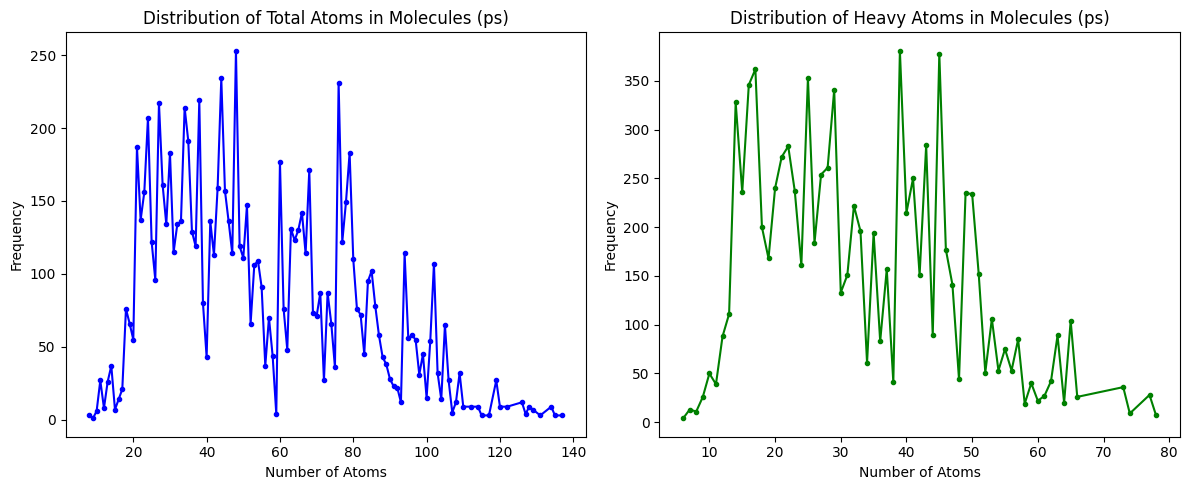

In [52]:
total_atoms_counts = extend_X['NumAtomsTotal'].value_counts().sort_index()
heavy_atoms_counts = extend_X['NumAtomsHeavy'].value_counts().sort_index()

# 绘制折线图
plt.figure(figsize=(12, 5))  # 创建一个新图形，并设置尺寸

# 第一个子图：包含所有原子的数量分布
plt.subplot(1, 2, 1)  
plt.plot(total_atoms_counts.index, total_atoms_counts.values, marker='o', linestyle='-', color='b', markersize=3)
plt.title('Distribution of Total Atoms in Molecules (ps)')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')

# 第二个子图：仅包含非氢原子的数量分布
plt.subplot(1, 2, 2)
plt.plot(heavy_atoms_counts.index, heavy_atoms_counts.values, marker='o', linestyle='-', color='g', markersize=3)
plt.title('Distribution of Heavy Atoms in Molecules (ps)')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')

plt.tight_layout()  # 自动调整子图参数，使它们不重叠
plt.show()  # 显示图形

In [53]:
min(total_atoms_counts.index), max(total_atoms_counts.index), min(heavy_atoms_counts.index), max(heavy_atoms_counts.index)

(8, 137, 6, 78)

###### 查找nan值

In [54]:
# 检查 NaN 值的总数
nan_count = extend_X.isna().sum()

# 找出存在 NaN 值的列
nan_columns = nan_count[nan_count > 0]

# 打印存在 NaN 值的列及其数量
print(f"Columns with NaN values and their counts:\n{nan_columns}")

# 找出含有NaN值的行索引
nan_rows = extend_X[extend_X.isna().any(axis=1)]
nan_rows

Columns with NaN values and their counts:
Series([], dtype: int64)


,Filename,SMILES,NumAtomsTotal,NumAtomsHeavy,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane


##### 检查非数值类型

In [55]:
# 检查非数值列
non_numeric_columns = extend_X.drop(columns=['Filename', 'SMILES']).select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")   # 188+226=414

Non-numeric columns: Index([], dtype='object')


##### 处理无穷大或无穷小

In [56]:
# 检查是否包含无穷大或 NaN 值
inf_values = extend_X.isin([np.inf, -np.inf]).sum().sum()
nan_values = extend_X.isna().sum().sum()
inf_values

0

In [57]:
extend_X_columns_set = set(extend_X.columns)
len(extend_X_columns_set)
# merged_columns_set

176

获取和训练集时同样的描述符

In [58]:
final_rdkit_descriptors_df = pd.read_csv('data/final_rdkit_descriptors_without_CM.csv')
final_rdkit_descriptors_df.head()

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW
0,-2.021156,p1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537
1,-2.993525,p2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066
2,-1.561702,p3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797
3,-2.847714,p4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888
4,-3.995537,p5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012


In [62]:
cols = list(final_rdkit_descriptors_df.columns)
cols.insert(2, 'SMILES')
cols.remove('lifetime')
cols

['Filename',
 'SMILES',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MinAbsEStateIndex',
 'MaxPartialCharge',
 'BCUT2D_MWHI',
 'BCUT2D_MRLOW']

In [64]:
extend_X_df_same_des_df = extend_X[cols]
extend_X_df_same_des_df.head()

,Filename,SMILES,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW
0,1.sdf,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,2.308093,1.227435,1.227435,-0.000139,14.273950,1.474828
1,10.sdf,Brc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,3.838429,1.070255,1.070255,0.018137,79.918731,1.623463
2,100.sdf,Cc1ccc(C#Cc2c3ccccc3c(C#Cc3ccccc3)c3cc4ccccc4c...,3.533942,1.008111,1.008111,0.040654,14.143554,1.459498
3,1000.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccc(I)cc3)c3ccccc23)cc1,9.173973,0.678583,0.678583,0.099110,126.912704,1.485139
4,1001.sdf,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1C#N,9.539119,0.398424,0.398424,0.100532,14.279392,1.431312


In [65]:
extend_X_df_same_des_df = extend_X_df_same_des_df.copy()
extend_X_df_same_des_df['Filename'] = (extend_X_df_same_des_df['Filename'].str.replace(r'\.sdf$', '', regex=True))
extend_X_df_same_des_df.head()

,Filename,SMILES,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW
0,1,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,2.308093,1.227435,1.227435,-0.000139,14.273950,1.474828
1,10,Brc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,3.838429,1.070255,1.070255,0.018137,79.918731,1.623463
2,100,Cc1ccc(C#Cc2c3ccccc3c(C#Cc3ccccc3)c3cc4ccccc4c...,3.533942,1.008111,1.008111,0.040654,14.143554,1.459498
3,1000,N#Cc1ccc(-c2c3ccccc3c(-c3ccc(I)cc3)c3ccccc23)cc1,9.173973,0.678583,0.678583,0.099110,126.912704,1.485139
4,1001,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1C#N,9.539119,0.398424,0.398424,0.100532,14.279392,1.431312


In [66]:
# merged_df_same_descriptor_df['Filename'] = 'E' + merged_df_same_descriptor_df['Filename'].astype(str)

In [67]:
path = './final_extend_data_rdkit_descriptors.csv'
extend_X_df_same_des_df.to_csv(path, index=False)

In [68]:
extend_data_rdkit_df = pd.read_csv(path)
extend_data_rdkit_df

,Filename,SMILES,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW
0,1,Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(-c4ccccc4)c4...,2.308093,1.227435,1.227435,-0.000139,14.273950,1.474828
1,10,Brc1ccc2c(-c3ccccc3)c3c(-c4ccccc4)c4ccccc4c(-c...,3.838429,1.070255,1.070255,0.018137,79.918731,1.623463
2,100,Cc1ccc(C#Cc2c3ccccc3c(C#Cc3ccccc3)c3cc4ccccc4c...,3.533942,1.008111,1.008111,0.040654,14.143554,1.459498
3,1000,N#Cc1ccc(-c2c3ccccc3c(-c3ccc(I)cc3)c3ccccc23)cc1,9.173973,0.678583,0.678583,0.099110,126.912704,1.485139
4,1001,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccccc23)cc1C#N,9.539119,0.398424,0.398424,0.100532,14.279392,1.431312
...,...,...,...,...,...,...,...,...
9424,995,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3ccc(I)cc23)cc1,9.190427,0.678562,0.678562,0.099110,126.912704,1.485047
9425,996,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3cc(I)ccc23)cc1,9.184727,0.678533,0.678533,0.099110,126.912704,1.485079
9426,997,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3)c3c(I)cccc23)cc1,9.190427,0.678562,0.678562,0.099110,126.912704,1.485066
9427,998,N#Cc1ccc(-c2c3ccccc3c(-c3ccccc3I)c3ccccc23)cc1,9.180301,0.678538,0.678538,0.099110,126.912704,1.485117


In [69]:
# X_filled = extend_data_rdkit_df.drop(['lifetime', 'Filename', 'SMILES'], axis=1)
# y = extend_data_rdkit_df['lifetime']
# X_filled.shape, y.shape